# Part I - Bike-Sharing Service In San Francisco Area
### by Ferdinand Paul

## Instructions:
In the first part I get an overview of the data and make first small general adjustments. The adjustments and additions to the dataset are only made from 'Univariate Exploration' onwards. All major adjustments can be found in df2 and are explained in the sections.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from geopy import distance
from pandas.api.types import CategoricalDtype


%matplotlib inline

In [2]:
# Import the '201902-fordgobike-tripdata.csv' file as an DataFrame
# Before i chceked the Data with Google Sheets and was shure about to change some DataTypes from some Columns

df = pd.read_csv('201902-fordgobike-tripdata.csv',dtype={3:'object', 7:'object', 11:'object'})
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# First check if all data types are as I expected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  object 
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Check basic statistical informations about the Data
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000


In [5]:
df.duplicated().sum()

0

In [6]:
# Check null values in the set
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# I decided to delete all rows with null values because I don't need them in my analysis. 
df.dropna(subset= ['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender'], inplace=True) 
# Short check if .drop has worked
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [8]:
# Convert 'start_time' and 'end_time' to DateTime DataType
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Convert 'start_time' and 'end_time' to format that i want to worke with
df['start_time'] = df['start_time'].astype('datetime64[s]')
df['end_time'] = df['end_time'].astype('datetime64[s]')

In [9]:
# Basic check whether the new column appears
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


### What is the structure of your dataset?

The data comes listed in a .csv file. It contains the user and route data of a bike rental company in San Francsico(Bay Area) and parts of Oakland and San José. The document is in wide format and allows fast and precise analysis. The file contains Data for the period of one month (Feb 2019).

### What is/are the main feature(s) of interest in your dataset?

Besides the quantity of subscribers and customers, I am interested in the most frequent pick-up and drop-off stations. In the following investigations, I want to find out whether there are any clusters in this respect. Furthermore, the data will provide an insight into the gender distribution. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The columns 'start_station_latitude', 'start_station_longitude', 'end_station_latitude' and 'end_station_longitude' allow good insights into the movement processes of the service users. Information can be extracted which allows even more detailed insights into the user behavior. In addition, it can be used to create a map on which possible clustering can be identified.

# Univariate Exploration

In [10]:
# Create a copy of the DataFrame for visual analysis
df2 = df.copy()

In [11]:
# Check the copy
df2.head()
#df2.info()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


## What are the top 10 favorite start locations?


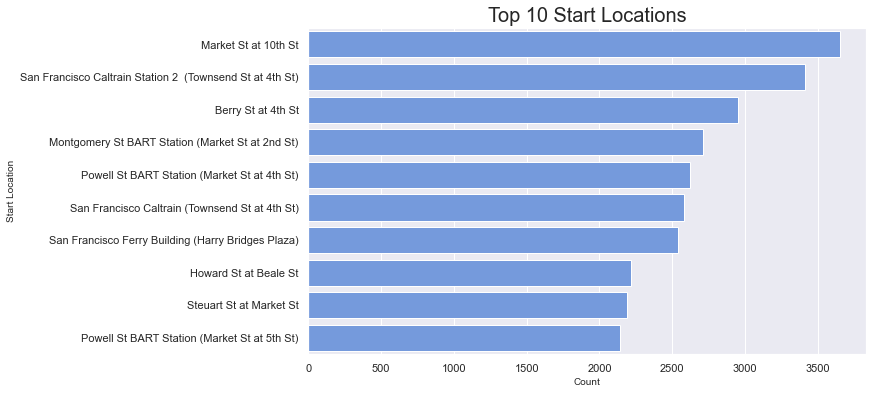

In [12]:
sb.set(rc = {'figure.figsize':(10,6)})

df_start_st = df2['start_station_name'].to_frame()
sb.set_palette("pastel")
p = sb.countplot(y='start_station_name', data= df_start_st,
             order=df_start_st['start_station_name'].value_counts().iloc[:10].index, color='cornflowerblue');
p.set_xlabel('Count', fontsize = 10)
p.set_ylabel('Start Location', fontsize = 10)
p.set_title('Top 10 Start Locations', fontsize = 20);

### Conclusion
The countplot shows the most used start locations. I need the results of this plot for later visualizations.

## What are the top 10 favorite end locations?

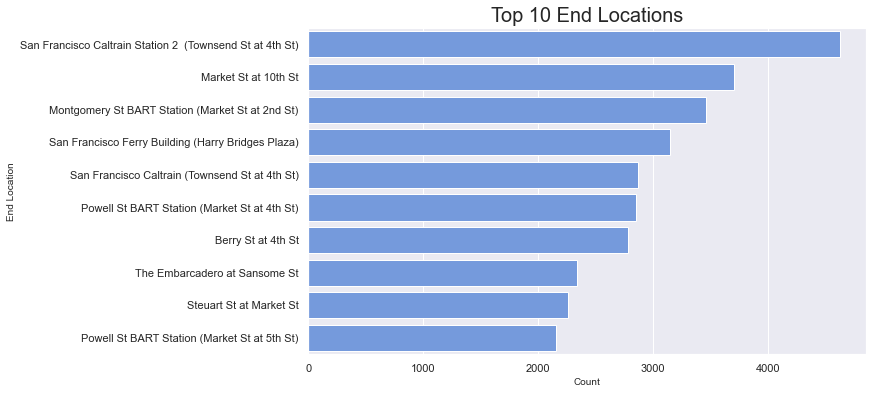

In [13]:
df_end_st = df2['end_station_name'].to_frame()
sb.set_palette("pastel")
p2 = sb.countplot(y='end_station_name', data= df_end_st,
             order=df_end_st['end_station_name'].value_counts().iloc[:10].index, color='cornflowerblue');
p2.set_xlabel('Count', fontsize = 10)
p2.set_ylabel('End Location', fontsize = 10)
p2.set_title('Top 10 End Locations', fontsize = 20);

### Conclusion
The countplot shows the most used end locations. I need the results of this plot for later visualizations.

## Are there differences in renting behavior depending on gender?

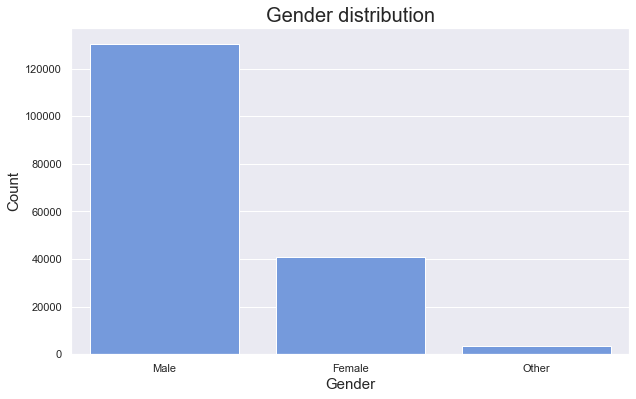

In [14]:
sb.set_palette("pastel")
df_gender = df2['member_gender'].to_frame()
p3 = sb.countplot(x='member_gender', data=df_gender, 
                  order=df_gender['member_gender'].value_counts().index, color='cornflowerblue')   
p3.set_xlabel('Gender', fontsize = 15)
p3.set_ylabel('Count', fontsize = 15)
p3.set_title('Gender distribution', fontsize = 20);

### Conclusion
The visualization shows that men rent more than twice as many bicycles as women.

## How do subscribers and customers break down the number of bikes rented?

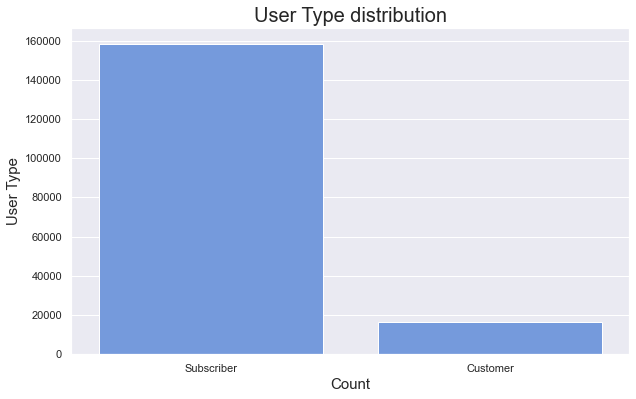

In [15]:
sb.set_palette("pastel")
df_user = df2['user_type'].to_frame()
p4 = sb.countplot(x='user_type', data=df_user, 
                  order=df_user['user_type'].value_counts().index, color='cornflowerblue')
p4.set_xlabel('Count', fontsize = 15)
p4.set_ylabel('User Type', fontsize = 15)
p4.set_title('User Type distribution', fontsize = 20);

### Conclusion
As expected, there are significantly more subscribers using the service than customers.

## Are the bicycles used differently often?
My guess is that bicycles do not circulate equally in the cityscape.

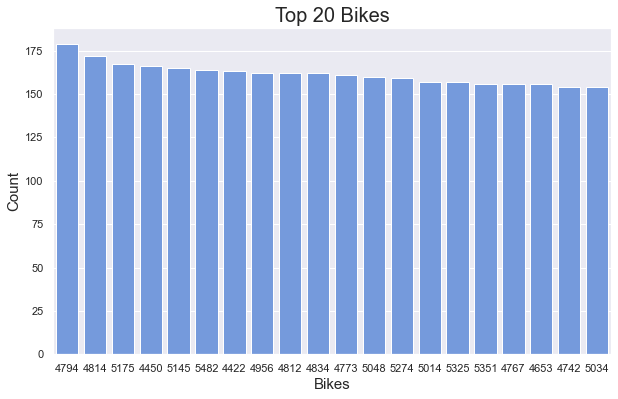

In [16]:
df_bike = df2['bike_id'].to_frame()
sb.set_palette("pastel")
sb.set(rc = {'figure.figsize':(10,6)})
p5 = sb.countplot(x='bike_id', data= df_bike,
             order=df_bike['bike_id'].value_counts().iloc[:20].index, color='cornflowerblue');
p5.set_xlabel('Bikes', fontsize = 15)
p5.set_ylabel('Count', fontsize = 15)
p5.set_title('Top 20 Bikes', fontsize = 20);

### Conclusion
The bicycles are used in a slightly different way. The aim is to find out whether there is a correlation between popular start and end points.

## At what time of day are bicycles most often used?
Presumably, the bicycles are used more often during rush hours.

In [17]:
# Creating new column from start and end 'latitude' + 'longitude' to distance
df2['Distance_km'] = df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']].apply(lambda x: distance.distance((x[0],x[1]), (x[2],x[3])).km, axis=1)

In [18]:
# There are some null values
df2['Distance_km'].sort_values(ascending=False)

112038    69.465977
19827     15.711156
50859     14.120769
153112    13.915237
87602     13.622447
            ...    
127750     0.000000
42452      0.000000
42453      0.000000
42491      0.000000
175258     0.000000
Name: Distance_km, Length: 174952, dtype: float64

In [19]:
# Check the mean the first time
df2['Distance_km'].sort_values(ascending=False).mean()

1.6899394998906927

In [20]:
# Are there null values in the distance column?
df2[df2['Distance_km']== 0.000000]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km
19,874,2019-02-28 23:43:05,2019-02-28 23:57:39,180,Telegraph Ave at 23rd St,37.812678,-122.268773,180,Telegraph Ave at 23rd St,37.812678,-122.268773,5629,Customer,1978.0,Male,No,0.0
27,408,2019-02-28 23:48:08,2019-02-28 23:54:56,78,Folsom St at 9th St,37.773717,-122.411647,78,Folsom St at 9th St,37.773717,-122.411647,5410,Subscriber,1982.0,Male,No,0.0
34,471,2019-02-28 23:42:43,2019-02-28 23:50:34,133,Valencia St at 22nd St,37.755213,-122.420975,133,Valencia St at 22nd St,37.755213,-122.420975,5559,Subscriber,1992.0,Male,No,0.0
55,3478,2019-02-28 22:39:35,2019-02-28 23:37:33,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,1846,Subscriber,1995.0,Male,No,0.0
56,3140,2019-02-28 22:44:53,2019-02-28 23:37:14,11,Davis St at Jackson St,37.797280,-122.398436,11,Davis St at Jackson St,37.797280,-122.398436,3040,Subscriber,1983.0,Female,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183317,1476,2019-02-01 02:45:04,2019-02-01 03:09:41,345,Hubbell St at 16th St,37.766483,-122.398279,345,Hubbell St at 16th St,37.766483,-122.398279,5224,Subscriber,1967.0,Male,No,0.0
183318,877,2019-02-01 02:53:15,2019-02-01 03:07:53,385,Woolsey St at Sacramento St,37.850578,-122.278175,385,Woolsey St at Sacramento St,37.850578,-122.278175,4913,Subscriber,1987.0,Male,No,0.0
183326,5713,2019-02-01 01:02:55,2019-02-01 02:38:09,31,Raymond Kimbell Playground,37.783813,-122.434559,31,Raymond Kimbell Playground,37.783813,-122.434559,5366,Subscriber,1972.0,Male,No,0.0
183350,874,2019-02-01 01:41:43,2019-02-01 01:56:17,253,Haste St at College Ave,37.866418,-122.253799,253,Haste St at College Ave,37.866418,-122.253799,3232,Subscriber,1995.0,Male,Yes,0.0


In [21]:
#Delete the rows with null values after checking the match with 'latitude' + 'longitude'.
df2.drop(df2[df2['Distance_km']== 0.000000].index, inplace = True)
df2[df2['Distance_km']== 0.000000]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km


In [22]:
# Does the mean has changed?
df2['Distance_km'].sort_values(ascending=False).mean()

1.7240153905377242

In [23]:
# I just need 2 digits in the distance column
df2['Distance_km'] = df2['Distance_km'].round(2)

In [24]:
# How much does less digits effect the .mean()?
df2['Distance_km'].sort_values(ascending=False).mean()

1.7240144844713503

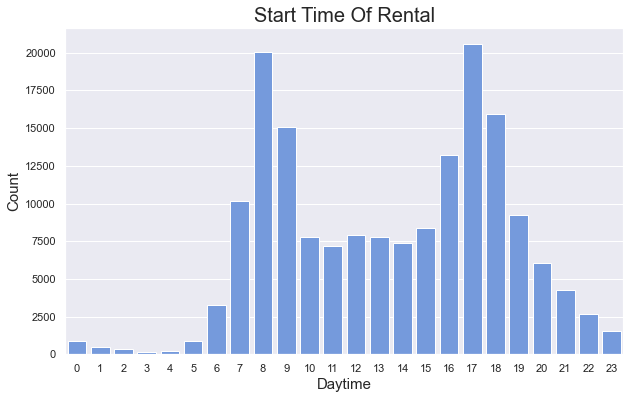

In [25]:
x = pd.DataFrame(df2['start_time'].dt.hour)
x = x.start_time.value_counts().sort_values(ascending=False)
x = pd.DataFrame(x)

sb.set(rc = {'figure.figsize':(10,6)})
p6 = sb.barplot(x=x.index, y=x.start_time, data=df2, color='cornflowerblue');
p6.set_xlabel('Daytime', fontsize = 15)
p6.set_ylabel('Count', fontsize = 15)
p6.set_title('Start Time Of Rental', fontsize = 20);

### Conclusion
As per my expectation, bicycles are most frequently used during rush hours. It can be concluded that the users use the bicycles to make their way to work.

## At what time of day are bicycles most often used?
Presumably, the bicycles are used more often during rush hours.

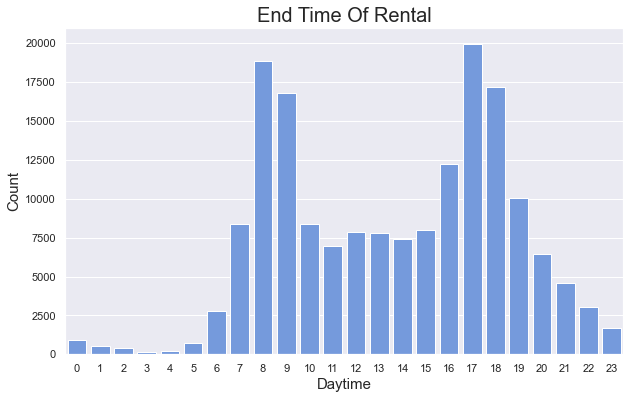

In [26]:
x2 = pd.DataFrame(df2['end_time'].dt.hour)
x2 = x2.end_time.value_counts().sort_values(ascending=False)
x2 = pd.DataFrame(x2)

p7 = sb.barplot(x=x2.index, y=x2.end_time, data=df2, color='cornflowerblue');
p7.set_xlabel('Daytime', fontsize = 15)
p7.set_ylabel('Count', fontsize = 15)
p7.set_title('End Time Of Rental', fontsize = 20);

### Conclusion
As per my expectation, bicycles are most frequently used during rush hours. It can be concluded that the users use the bicycles to make their way to work.

## On which days are the bicycles most frequently used?
It is difficult to predict on which days of the week the most trips are made.

In [27]:
# Creating a column for Day of Week 
df2['weekday_num'] = df2['start_time'].dt.dayofweek

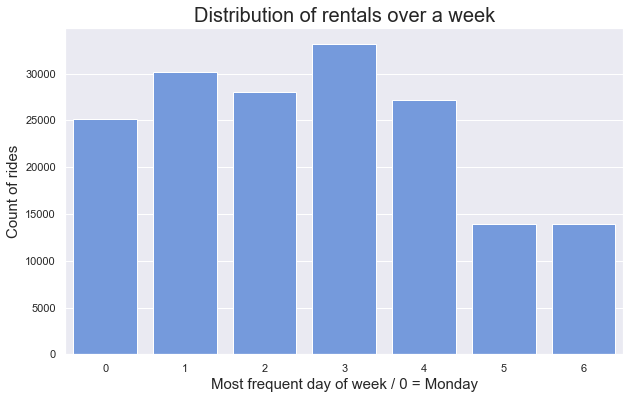

In [28]:
sb.set(rc = {'figure.figsize':(10,6)})
sb.set_palette("pastel")
order_fwd = df2['weekday_num'].value_counts()
order_fwd = order_fwd.sort_index().index
p8 = sb.countplot(x=df2['weekday_num'], data=df2, 
                  order=order_fwd, color='cornflowerblue')
p8.set_xlabel('Most frequent day of week / 0 = Monday', fontsize = 15)
p8.set_ylabel('Count of rides', fontsize = 15)
p8.set_title('Distribution of rentals over a week', fontsize = 20);

### Conclusion
From the previous visualizations, it can be seen that bicycles are mostly used during the week for trips to work. This explains why bicycles are less frequented on weekends. Why bicycles are used more often in the middle of the week is difficult to find out. Perhaps it is due to alcohol consumption on weekends.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

First, I made an overview of the different distributions. Who uses the bicycles, do the two user types use the bicycles differently, on which days of the week and at which hours are the bicycles most often used, at which stations are the bicycles most often dropped off and picked up? Some changes and additions had to be made in order to create the visualizations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

For the analysis of the use of bicycles by time of day, I had to extract the hours from the date and create a new column for this. In the same way, I had to extract the days of the week from the date for a more detailed analysis and save them in a new column.

# Bivariate Exploration

In [29]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,weekday_num
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.54,3
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.71,3
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.26,3
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.41,3
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3.33,3


## How is age distributed over the number of trips? Are there differences in gender?
People in their 20s and 40s are probably the most likely to use bicycles because they work and are familiar with paying via app.

In [30]:
# It happens that the birth dates are sometimes too far in the past.  

# Check the .min value of the column 'member_birth_year'
df2['member_birth_year'].min()

1878.0

In [31]:
# There was an outlier. Check if there are more.
df2[df2['member_birth_year'] < 1930.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,weekday_num
1285,148,2019-02-28 19:29:17,2019-02-28 19:31:45,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,0.79,3
10827,1315,2019-02-27 19:21:34,2019-02-27 19:43:30,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No,4.76,2
16087,1131,2019-02-27 08:37:36,2019-02-27 08:56:28,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No,4.32,2
17981,366,2019-02-26 19:53:38,2019-02-26 19:59:44,50,2nd St at Townsend St,37.780526,-122.390288,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5226,Subscriber,1920.0,Male,No,1.37,1
18885,432,2019-02-26 17:48:59,2019-02-26 17:56:11,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,50,2nd St at Townsend St,37.780526,-122.390288,5319,Subscriber,1920.0,Male,No,1.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173711,993,2019-02-03 09:45:30,2019-02-03 10:02:04,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No,4.32,6
177708,1527,2019-02-01 19:09:28,2019-02-01 19:34:55,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No,4.76,4
177885,517,2019-02-01 18:38:40,2019-02-01 18:47:18,25,Howard St at 2nd St,37.787522,-122.397405,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No,1.23,4
182830,428,2019-02-01 07:45:05,2019-02-01 07:52:14,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No,1.03,4


In [32]:
# Deleting the outlier that was way too far in the past and would interfere with my analyses.
df2.drop(df2[df2['member_birth_year'] < 1930.0].index, inplace = True)

In [33]:
# Check if .drop has worked
df2[df2['member_birth_year'] < 1930.0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,weekday_num


In [34]:
# Change DataType from float to int
df2['member_birth_year'] = df2['member_birth_year'].astype('int64')

In [35]:
# Checking one more time the 'member_birth_year' column
df2['member_birth_year'].max()
df2['member_birth_year'].min()

1930

In [36]:
# Creating column with age of users
df2['age'] = 2022 - df2['member_birth_year']

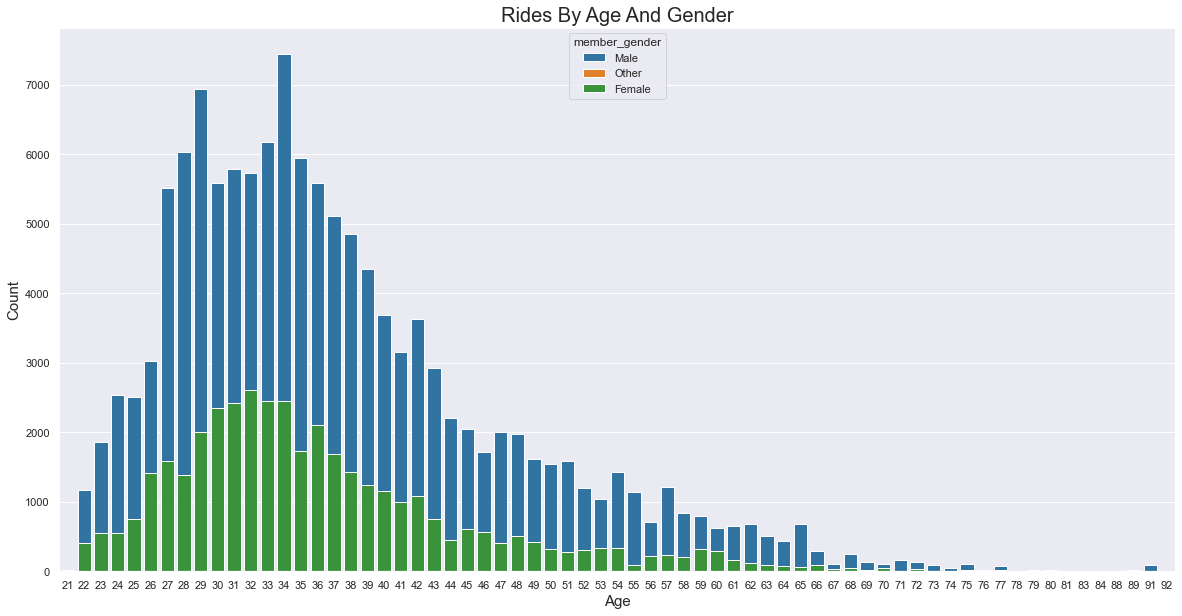

In [37]:
sb.set_palette("tab10")
plt.figure(figsize=(20,10))
p9 = sb.countplot(x=df2['age'], hue="member_gender", data=df2, dodge=False);
p9.set_xlabel('Age', fontsize = 15)
p9.set_ylabel('Count', fontsize = 15)
p9.set_title('Rides By Age And Gender', fontsize = 20);

### Conclusion
As suspected, the most frequent use of bicycles is distributed among people between the ages of 20 and 40. this may be due to the fact that people in this age group are employed and familiar with modern payment methods.

## What is the number of rides distributed over a week measured by user type?
In addition to the visualization above, I would like to find out whether there are differences between subscribers and customers in terms of usage by day of the week.

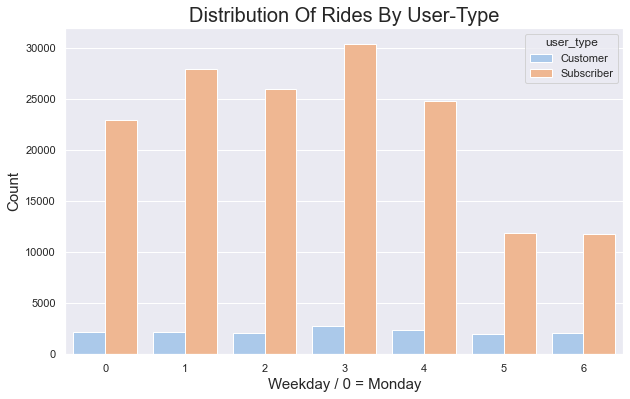

In [38]:
order_rbu = df2['weekday_num'].value_counts()
order_rbu = order_rbu.sort_index().index

sb.set_palette("pastel")
#plt.figure(figsize=(20,10))
p10 = sb.countplot(x=df2['weekday_num'], hue="user_type", order=order_rbu, data=df2);
p10.set_xlabel('Weekday / 0 = Monday', fontsize = 15)
p10.set_ylabel('Count', fontsize = 15)
p10.set_title('Distribution Of Rides By User-Type', fontsize = 20);

### Conclusion
The two groups are similar in the distribution of usage by day of the week.

## What is the average speed measured by gender?

In [39]:
# Creating a new column for duration in hours and round all values inside to 2 digits.
df2['duration_hours'] = df2['duration_sec']/60/60
df2['duration_hours'] = df2['duration_hours'].round(2)
df2[df2['duration_hours']==0.00]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,weekday_num,age,duration_hours


In [40]:
# Creating a new column for average speed, round all values to 2 digits, check if there are null values left
df2['average_speed_kmh'] = df2['Distance_km'] / df2['duration_hours']
df2['average_speed_kmh'] = df2['average_speed_kmh'].round(2)
df2[df2['average_speed_kmh']== 0.00]
df2['average_speed_kmh'].mean()

11.068945028789633

In [41]:
# Calculating the men's average speed
x4 = df2[df['member_gender']=='Male']
x4 = x4['Distance_km'] / x4['duration_hours']
x4.mean()

/var/folders/hv/bc_z390526x7_p27dt9n021m0000gn/T/ipykernel_815/3679698999.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x4 = df2[df['member_gender']=='Male']


11.240636395079557

In [42]:
# Calculating the woman's average speed
y = df2[df['member_gender']=='Female']
y = y['Distance_km'] / y['duration_hours']
y.mean()

/var/folders/hv/bc_z390526x7_p27dt9n021m0000gn/T/ipykernel_815/1237661723.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df2[df['member_gender']=='Female']


10.525160175586624

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,weekday_num,age,duration_hours,average_speed_kmh
112038,6945,2019-02-12 14:28:44,2019-02-12 16:24:30,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300,Palm St at Willow St,37.317298,...,4780,Subscriber,1985,Female,No,69.47,1,37,1.93,35.99


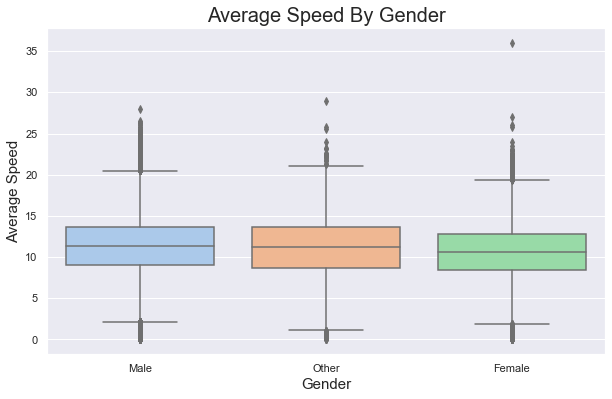

In [43]:
sb.set_palette("pastel")
p11 = sb.boxplot(x=df['member_gender'], y=df2['average_speed_kmh'])
p11.set_xlabel('Gender', fontsize = 15)
p11.set_ylabel('Average Speed', fontsize = 15)
p11.set_title('Average Speed By Gender', fontsize = 20);

# interesting to see: This bike was probably in a car
df2[df2['average_speed_kmh']>30]

## What is the average speed by age?
People between the ages of 20 and 40 are probably faster than other age groups.

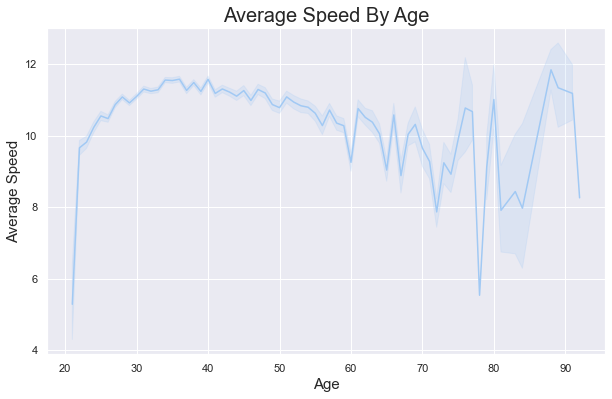

In [44]:
sb.set_palette("pastel")
p12 = sb.lineplot(x=df2['age'], y=df2['average_speed_kmh'], data=df2)
p12.set_xlabel('Age', fontsize = 15)
p12.set_ylabel('Average Speed', fontsize = 15)
p12.set_title('Average Speed By Age', fontsize = 20);

### Conclusion
The suspicions have been confirmed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

My predictions mostly coincide with the results of the visualizations. There is an outlier at the distance of 69 km with an average speed of about 35 km/h. Probably the bike was transported in the rented zusatnd by car.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

My predictions mostly coincide with the results of the visualizations. See descriptions at visualizations.

# Multivariate Exploration

## What is the average speed by age and user type?
In addition to the previous analysis, the next visualization is to find out whether there are differences between user types. I suspect that subscribers are somewhat fitter and therefore faster due to the more frequent use of bicycles.

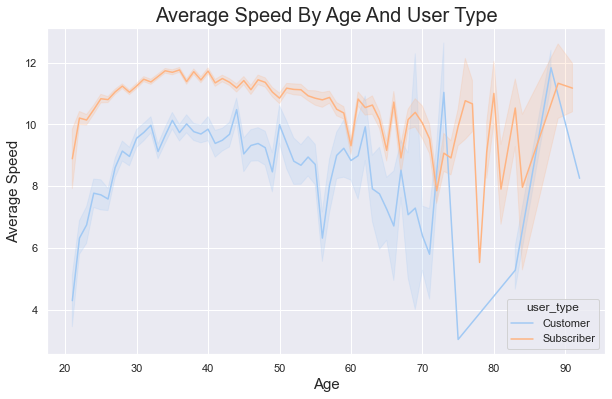

In [45]:
sb.set_palette("pastel")
p13 = sb.lineplot(x=df2['age'], y=df2['average_speed_kmh'], hue=df2['user_type'], data=df2)
p13.set_xlabel('Age', fontsize = 15)
p13.set_ylabel('Average Speed', fontsize = 15)
p13.set_title('Average Speed By Age And User Type', fontsize = 20);

### Conclusion
As expected, subscribers are somewhat faster than customers.  Either subscribers use the bikes more often and are therefore fitter or it is due to the discrepancy in the frequency of the data.

## What are the correlations in the quantitative columns?

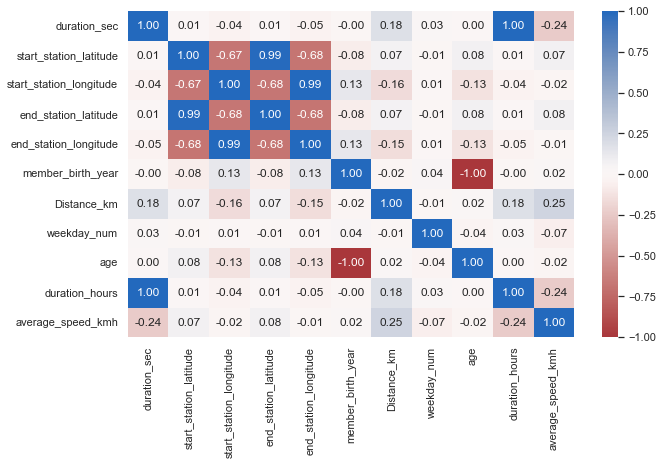

In [46]:
sb.set_palette("pastel")
p14 = sb.heatmap(df2.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

## How is the gender distributed among the days of the week by distance?

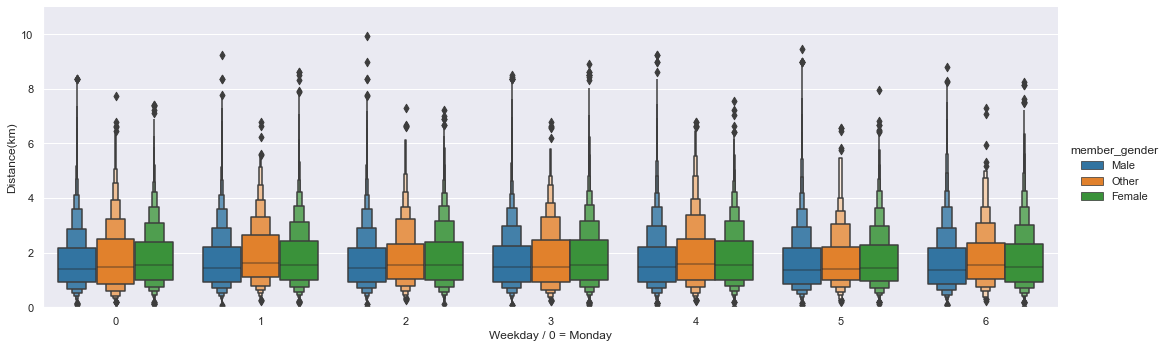

In [56]:
order_dd = df2['weekday_num'].value_counts()
order_dd = order_dd.sort_index().index

sb.set_palette("tab10")
p15 = sb.catplot(x="weekday_num", y="Distance_km", hue="member_gender", kind="boxen", 
                 data=df2, order=order_dd, height=5, aspect=3)
p15.set(ylim=(0, 11));
p15.set(xlabel='Weekday / 0 = Monday', ylabel='Distance(km)');

## On which days of the week is the greatest distance traveled by gender?

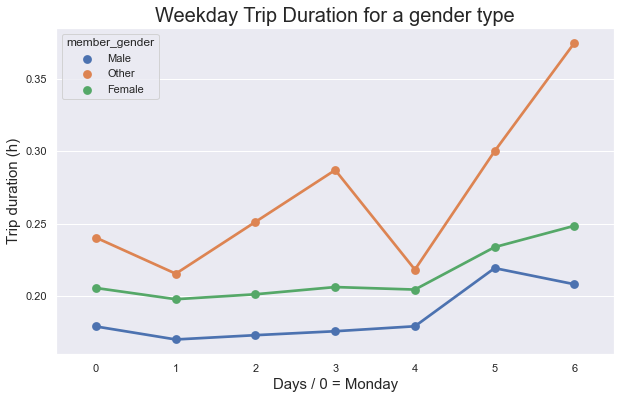

In [48]:
order_wd = df2['weekday_num'].value_counts()
order_wd = order_wd.sort_index().index

sb.set(rc = {'figure.figsize':(10,6)})
p16 = sb.pointplot(data = df2, x = 'weekday_num', y = 'duration_hours', hue = 'member_gender', order = order_wd, ci=None)
p16.set_xlabel('Days / 0 = Monday', fontsize = 15)
p16.set_ylabel('Trip duration (h)', fontsize = 15)
p16.set_title('Weekday Trip Duration for a gender type', fontsize = 20);


## Multible Representation Of User Behavior

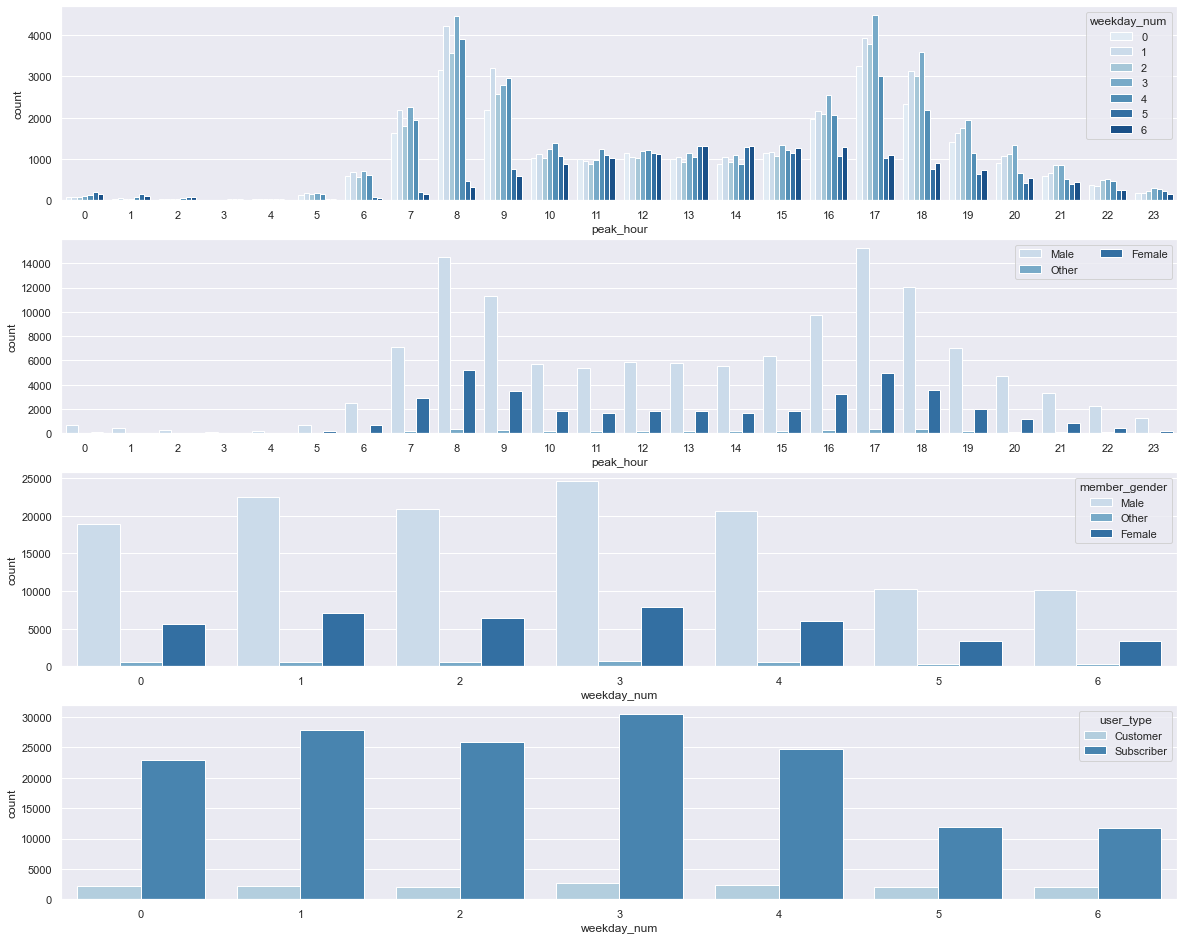

In [58]:
plt.figure(figsize = [20, 25]);

df2['peak_hour'] = pd.DataFrame(df2['start_time'].dt.hour)

plt.subplot(6, 1, 1);
sb.countplot(data = df2, x = 'peak_hour', hue = 'weekday_num', palette = 'Blues');


ax = plt.subplot(6, 1, 2);
sb.countplot(data = df2, x = 'peak_hour', hue = 'member_gender', palette = 'Blues');
ax.legend(ncol = 2); 

ax = plt.subplot(6, 1, 3);
sb.countplot(data = df2, x = 'weekday_num', hue = 'member_gender', palette = 'Blues');

ax = plt.subplot(6, 1, 4);
sb.countplot(data = df2, x = 'weekday_num', hue = 'user_type', palette = 'Blues');

### Conclusion
While there is generally less use of the service on weekends, the distances traveled are longer.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Not surprisingly, there are correlations between age and average speed. On weekdays, the service is more likely to be used for trips to work because the bikes are rented at rush hour, and on weekends probably more for trips. My main focus is on recurring use of the same stations for dispensing and recording. whether there is clustering i will investigate in the next part.

### Were there any interesting or surprising interactions between features?

Surprisingly, I found that subscribers have a higher average speed than customers. Unfortunately, the data lacks a user id, so it is not possible to identify returning users, making it difficult to say that subscribers are fitter than customers.

## Conclusions
In the first part I got a rough overview of the data and made small changes to get to know the data better in the next part with the help of visualizations. I was able to identify some interesting relationships and extract important information. 


In [50]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_km,weekday_num,age,duration_hours,average_speed_kmh,peak_hour
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,0.54,3,38,14.50,0.04,17
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2.71,3,50,17.18,0.16,12
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,0.26,3,33,10.14,0.03,17
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,2.41,3,48,0.44,5.48,23
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,3.33,3,63,0.50,6.66,23


In [51]:
# Export .csv for Explanatory
df2.to_csv('201902-fordgobike-tripdata.csv_master', index=False )